# Tutorial Exercises 2 - 

In this exercise, we will see how we can work out the answer to an an arbitrary probability problem, by simulating the data generating distribution

This exercise is based on the card game Bridge, although you do not have to know the rules of Bridge to do this exercise!

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Modelling the cards

Bridge is played with a standard pack of 52 playing cards, which has 13 cards in each suit (the suits are hearts, diamonds, spades and clubs)

There are four players and each receives 13 cards.

In the first phase of the game, each players secretly add up the number of points in their hand. Only picture cards carry points, as follows:

* Jack = 1 point
* Queen = 2 points
* King = 3 points
* Ace = 4 points

Let's simulate a random deal and work out how many points each player got.

We start by modelling our cards. Since we are interested in only the number of points each player gets, we can model our cards as follows (each row is a suit):

In [2]:
cards = [0,0,0,0,0, 0,0,0,0,0, 1,2,3,4,
         0,0,0,0,0, 0,0,0,0,0, 1,2,3,4,
         0,0,0,0,0, 0,0,0,0,0, 1,2,3,4,
         0,0,0,0,0, 0,0,0,0,0, 1,2,3,4]

### Shuffle the cards

Of course we need to shuffle them before we deal them!

Let's use the function `np.random.shuffle()` which randomly re-orders our array `cards`

* Note that `np.random.shuffle()` works *in place* which mmeans by running the function, we actually scrable our original array of playing cards

In [3]:
np.random.shuffle(cards)
# uncomment then line below to look at the 52 shuffled cards
# cards

### Deal the cards

Let's deal the first 13 cards to player 1, the next 13 cards to player 2, etc, and add up each player's points

In [4]:
points = [sum(cards[0:13]),
          sum(cards[13:26]),
          sum(cards[26:39]),
          sum(cards[39:52])]
points

[8, 4, 15, 13]

In [5]:
nReps=10000
cards = [0,0,0,0,0, 0,0,0,0,0, 1,2,3,4,
         0,0,0,0,0, 0,0,0,0,0, 1,2,3,4,
         0,0,0,0,0, 0,0,0,0,0, 1,2,3,4,
         0,0,0,0,0, 0,0,0,0,0, 1,2,3,4]
bid = np.empty(nReps)

for i in range(nReps):
    
    np.random.shuffle(cards)
    
    points = np.array([sum(cards[0:13]),
          sum(cards[13:26]),
          sum(cards[26:39]),
          sum(cards[39:52])])
    
    bid[i] = sum(points>=13)

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0.2594

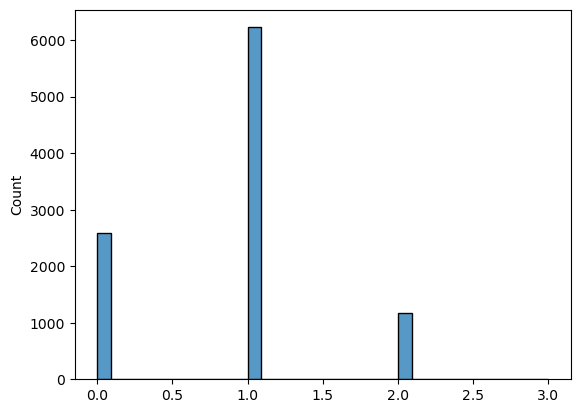

In [6]:
sns.histplot(bid)
np.mean(bid==0)

In [7]:
stats.binom.cdf(5,25,0.2622)

0.32659478719691104

$$t = \frac{\bar{x}-\mu}{\frac{s_{x-\mu}}{\sqrt{n}}}$$,
